This notebooks experiments with the year of the movie release. We analyse the distribution of data and determine the appropriate era information to classify movies. Then the content based approach is used to form a user vector based on the era preference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import pdb

In [3]:
# Load movies data
md = pd.read_csv("../5_data/movies_tmdb.csv", converters={"genres": literal_eval})

In [4]:
md.shape

(4803, 20)

In [5]:
# Pre-processing step for getting year from date by splliting it using '-'
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [6]:
md.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012


(array([1195., 1373.,  909.,  616.,  250.,  111.,  115.,   95.,   42.,
          28.,   18.,   21.,   11.,   10.,    9.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60., 66., 72.,
        78., 84., 90.]),
 <BarContainer object of 15 artists>)

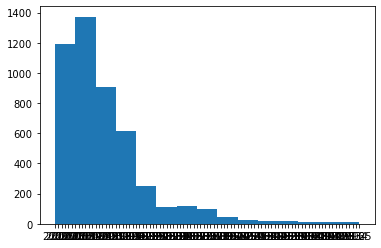

In [7]:
plt.hist(md.year, bins = 15)

In [8]:
md.year.describe()

count     4803
unique      91
top       2009
freq       247
Name: year, dtype: object

In [9]:
mask = md['year'] == 'NaT'
md[md['year'] == 'NaT'].shape

(1, 21)

In [10]:
md_refined = md[~mask]
md_refined.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012


Text(0.5, 1.0, 'Histogram')

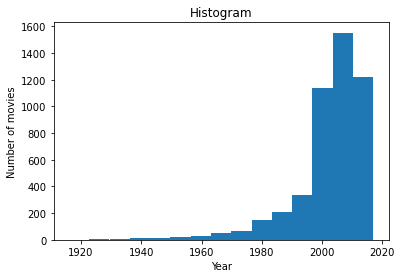

In [11]:
# md['year'].replace({pd.NaT: 0}, inplace=True)
plt.hist(md_refined['year'].astype(int), bins=15)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Histogram')

In [12]:
def get_era(x):
    year = int(x['year'])
    era = ''
    if year > 2010:
        era = '10s' 
    elif year >= 2000:
        era = '2000s'
    elif year > 1980: 
        era = '90s'
    else:
        era = 'Old'
    return era

In [13]:
def get_era_vector(x):
    year = int(x['year'])
    era_vector = np.zeros(4)
    if year > 2010:
        era_vector[3] = 1
    elif year >= 2000:
        era_vector[2] = 1
    elif year > 1980: 
        era_vector[1] = 1
    else:
        era_vector[0] = 1
    return era_vector

In [14]:
md_refined['era'] = md_refined.apply(get_era, axis=1)
md_refined['era_vector'] = md_refined.apply(get_era_vector, axis=1)

/var/folders/7l/8dt2fvys1b75lrc4gj_0dfb40000gn/T/ipykernel_29839/1898248043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_refined['era'] = md_refined.apply(get_era, axis=1)
/var/folders/7l/8dt2fvys1b75lrc4gj_0dfb40000gn/T/ipykernel_29839/1898248043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_refined['era_vector'] = md_refined.apply(get_era_vector, axis=1)


In [15]:
md_refined.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,era,era_vector
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2000s,"[0.0, 0.0, 1.0, 0.0]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,2000s,"[0.0, 0.0, 1.0, 0.0]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,10s,"[0.0, 0.0, 0.0, 1.0]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,10s,"[0.0, 0.0, 0.0, 1.0]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,10s,"[0.0, 0.0, 0.0, 1.0]"


In [16]:
md_refined[['movieId', 'era_vector']].to_csv('../5_data/processed/movie_era_vector.csv')

KeyError: "['movieId'] not in index"

In [ ]:
md_undef = md[mask]
md_undef.head()

,Unnamed: 0,movieId,genres,overview,popularity,release_date,tagline,title,vote_average,vote_count,year
140,140,142,[Drama],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
598,598,604,[Documentary],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
709,709,720,"[Adventure, Animation, Comedy]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
710,710,721,[Drama],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
712,712,723,[Drama],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
# ## Failed attempt - 1 
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# mlb.fit_transform(md_refined['era'])
# list(mlb.classes_)

In [ ]:
# ## Failed attempt - 2
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit(md_refined['era'])

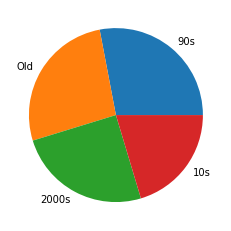

In [ ]:
plt.pie(md_refined['era'].value_counts(), labels = md_refined['era'].unique())
plt.show()

## Making user vector for era!

In [ ]:
ratings_train = pd.read_csv("training_data.csv", converters={"genres": literal_eval, "tag": literal_eval})

In [ ]:
user_ids = ratings_train['userId'].unique()
user_df = pd.DataFrame(columns=['userId', 'user_era_vector'])
error_count = 0
for user_id in user_ids:
    user_rating_df = ratings_train[(ratings_train['userId'] == user_id)]
    user_vector = np.zeros(4)
    count_vector = np.zeros(4)
    for _, row in user_rating_df.iterrows():
        if len(md_refined['era_vector'][md_refined['movieId'] == row['movieId']].values):
            user_movie_vector = md_refined['era_vector'][md_refined['movieId'] == row['movieId']].values[0]
            count_vector += user_movie_vector
            user_vector += user_movie_vector*row.rating
        else:
            error_count += 1
            print("No era vector for this movie: ", row['movieId'])
    count_vector = np.where(count_vector==0, 1, count_vector)
    user_vector = np.divide(user_vector, count_vector)
    row_df = pd.DataFrame([[user_id, user_vector]], columns=['userId', 'user_era_vector'])
    user_df = pd.concat([user_df, row_df], ignore_index=True)

No era vector for this movie:  720
No era vector for this movie:  27611
No era vector for this movie:  122926
No era vector for this movie:  150548
No era vector for this movie:  177593
No era vector for this movie:  180095
No era vector for this movie:  180777
No era vector for this movie:  185135
No era vector for this movie:  720
No era vector for this movie:  52281
No era vector for this movie:  122912
No era vector for this movie:  177593
No era vector for this movie:  180095
No era vector for this movie:  187593
No era vector for this movie:  26649
No era vector for this movie:  52281
No era vector for this movie:  69849
No era vector for this movie:  27611
No era vector for this movie:  150548
No era vector for this movie:  62336
No era vector for this movie:  175485
No era vector for this movie:  175661
No era vector for this movie:  176371
No era vector for this movie:  179073
No era vector for this movie:  188301
No era vector for this movie:  190183
No era vector for this mo

No era vector for this movie:  4241
No era vector for this movie:  90647
No era vector for this movie:  94735
No era vector for this movie:  100044
No era vector for this movie:  122906
No era vector for this movie:  171495
No era vector for this movie:  173197
No era vector for this movie:  176371
No era vector for this movie:  177593
No era vector for this movie:  182715
No era vector for this movie:  188675
No era vector for this movie:  188833
No era vector for this movie:  2894
No era vector for this movie:  177765
No era vector for this movie:  187593
No era vector for this movie:  122912
No era vector for this movie:  176371
No era vector for this movie:  177593
No era vector for this movie:  183897
No era vector for this movie:  185029
No era vector for this movie:  187541
No era vector for this movie:  187593
No era vector for this movie:  189111
No era vector for this movie:  190209
No era vector for this movie:  190213
No era vector for this movie:  190215
No era vector for 

In [ ]:
error_count

436

In [ ]:
user_df.head()

,userId,user_era_vector
0,1,"[4.63265306122449, 4.2727272727272725, 4.6, 0.0]"
1,2,"[0.0, 3.8333333333333335, 4.05, 3.85]"
2,3,"[2.4583333333333335, 2.6875, 0.5, 0.0]"
3,4,"[4.4375, 3.256637168141593, 3.3214285714285716..."
4,5,"[5.0, 3.5588235294117645, 0.0, 0.0]"


In [ ]:
user_df.to_csv("user_era_vector.csv")

In [ ]:
ratings_test = pd.read_csv("testing_data.csv", converters={"genres": literal_eval, "tag": literal_eval}) 
ratings_test.head()

,userId,movieId,rating,timestamp,genres,tag
0,1,3,4.0,964981247,"[Comedy, Romance]",[]
1,1,163,5.0,964983650,"[Action, Romance, Western]",[]
2,1,316,3.0,964982310,"[Action, Adventure, Sci-Fi]",[]
3,1,349,4.0,964982563,"[Action, Crime, Drama, Thriller]",[]
4,1,441,4.0,964980868,[Comedy],[]


In [ ]:
algo_predictions = pd.DataFrame(columns=['userId', 'movieId', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
error_count = 0
for ind, row in ratings_test.iterrows():
    userId = row['userId']
    movieId = row['movieId']
    og_rating = row['rating']
    
    user_vector = user_df[user_df['userId'] == int(userId)].user_era_vector.values[0]
    if len(md_refined[md_refined['movieId'] == int(movieId)].era_vector.values):
        movie_vector = md_refined[md_refined['movieId'] == int(movieId)].era_vector.values[0]
    else:
        error_count += 1
        print("Movie vector not found!", movieId)
    predicted_rating = user_vector*movie_vector

    if predicted_rating.any():
        predicted_rating = np.nanmean(np.where(predicted_rating!=0, predicted_rating, np.nan))
    else:
        predicted_rating = 0

    row_df = pd.DataFrame([[userId, movieId, user_vector, movie_vector, og_rating, predicted_rating]], 
                columns=['userId', 'movieId', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
    algo_predictions = pd.concat([algo_predictions, row_df], ignore_index=True)

Movie vector not found! 2851
Movie vector not found! 176101
Movie vector not found! 720
Movie vector not found! 148675
Movie vector not found! 176371
Movie vector not found! 187541
Movie vector not found! 27611
Movie vector not found! 4207
Movie vector not found! 176101
Movie vector not found! 52281
Movie vector not found! 176371
Movie vector not found! 176601
Movie vector not found! 185031
Movie vector not found! 177185
Movie vector not found! 182297
Movie vector not found! 182731
Movie vector not found! 122912
Movie vector not found! 179819
Movie vector not found! 187541
Movie vector not found! 52281
Movie vector not found! 172909
Movie vector not found! 178613
Movie vector not found! 52281
Movie vector not found! 176329
Movie vector not found! 179211
Movie vector not found! 179953
Movie vector not found! 181065
Movie vector not found! 183227
Movie vector not found! 175303
Movie vector not found! 176371
Movie vector not found! 27611
Movie vector not found! 5264
Movie vector not found

In [ ]:
algo_predictions

,userId,movieId,user_vector,movie_vector,og_rating,pred_rating
0,1,3,"[4.63265306122449, 4.2727272727272725, 4.6, 0.0]","[0.0, 1.0, 0.0, 0.0]",4.0,4.272727
1,1,163,"[4.63265306122449, 4.2727272727272725, 4.6, 0.0]","[0.0, 1.0, 0.0, 0.0]",5.0,4.272727
2,1,316,"[4.63265306122449, 4.2727272727272725, 4.6, 0.0]","[0.0, 1.0, 0.0, 0.0]",3.0,4.272727
3,1,349,"[4.63265306122449, 4.2727272727272725, 4.6, 0.0]","[0.0, 1.0, 0.0, 0.0]",4.0,4.272727
4,1,441,"[4.63265306122449, 4.2727272727272725, 4.6, 0.0]","[0.0, 1.0, 0.0, 0.0]",4.0,4.272727
...,...,...,...,...,...,...
20163,610,156726,"[4.180327868852459, 4.133928571428571, 3.47853...","[0.0, 0.0, 0.0, 1.0]",4.5,3.655378
20164,610,159093,"[4.180327868852459, 4.133928571428571, 3.47853...","[0.0, 0.0, 0.0, 1.0]",3.0,3.655378
20165,610,161582,"[4.180327868852459, 4.133928571428571, 3.47853...","[0.0, 0.0, 0.0, 1.0]",4.0,3.655378
20166,610,162350,"[4.180327868852459, 4.133928571428571, 3.47853...","[0.0, 0.0, 0.0, 1.0]",3.5,3.655378


In [ ]:
rmse = ((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2).mean() ** .5
rmse

0.9358895888905493

In [ ]:
mae = (((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2) ** .5).mean()
mae

0.7194232226489858

In [ ]:
algo_predictions.to_csv("era_predictions.csv")